In [16]:
import geopandas as gpd
import pandas as pd
import os
from shapely.geometry import LineString
import contextily
import matplotlib.pyplot as plt
# from datasets import load_dataset

In [2]:
data_dir = os.path.join(os.getcwd(), "..", "..", "preprocessing", "geolife", "data")

In [3]:
df_geolife = pd.read_parquet(os.path.join(data_dir, "geolife_linestring.parquet"))

In [4]:
# df_geolife = load_dataset("kraina/geolife")["train"].to_pandas()

In [6]:
df_geolife["geometry"] = df_geolife["arrays_geometry"].map(LineString)
geolife = gpd.GeoDataFrame(
    df_geolife.drop(["arrays_geometry"], axis=1),
    geometry=df_geolife["geometry"],
    crs="EPSG:4326",
)

In [13]:
geolife.head()

,latitude,longitude,altitude,time,mode,user_id,geometry
trajectory_id,,,,,,,
20000101231219,"[39.988992, 39.990964, 39.993207]","[116.327023, 116.327041, 116.326827]","[128.937004593176, 221.128615485564, 217.19159...","[2000-01-01 23:12:19, 2000-01-01 23:13:21, 200...","[unknown, unknown, unknown]",163,"LINESTRING (116.32702 39.98899, 116.32704 39.9..."
20070412093132,"[39.9742333333333, 39.9743166666667, 39.974466...","[116.330383333333, 116.33045, 116.33045, 116.3...","[823.490813648294, 823.490813648294, 741.46981...","[2007-04-12 09:31:32, 2007-04-12 09:39:37, 200...","[unknown, unknown, unknown, unknown, unknown, ...",142,"LINESTRING (116.33038 39.97423, 116.33045 39.9..."
20070412101853,"[39.9755166666667, 39.97585, 39.9759833333333,...","[116.330283333333, 116.3304, 116.330466666667,...","[351.049868766404, 114.829396325459, 114.82939...","[2007-04-12 10:18:53, 2007-04-12 10:20:15, 200...","[unknown, unknown, bike, bike, walk]",161,"LINESTRING (116.33028 39.97552, 116.33040 39.9..."
20070412102116,"[39.9764666666667, 39.9764, 39.97625, 39.9762,...","[116.330066666667, 116.33015, 116.330266666667...","[173.884514435696, 173.884514435696, 173.88451...","[2007-04-12 10:21:16, 2007-04-12 10:21:22, 200...","[bike, bike, bike, bike, bike, bike, bike, bik...",163,"LINESTRING (116.33007 39.97647, 116.33015 39.9..."
20070412102325,"[39.97585, 39.9759833333333, 39.9761, 39.97623...","[116.3304, 116.330466666667, 116.3305, 116.330...","[114.829396325459, 114.829396325459, 118.11023...","[2007-04-12 10:23:25, 2007-04-12 10:24:37, 200...","[walk, walk, walk, walk]",161,"LINESTRING (116.33040 39.97585, 116.33047 39.9..."


In [7]:
geolife.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17784 entries, 20000101231219 to 20120727080700
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   latitude   17784 non-null  object  
 1   longitude  17784 non-null  object  
 2   altitude   17784 non-null  object  
 3   time       17784 non-null  object  
 4   mode       17784 non-null  object  
 5   user_id    17784 non-null  object  
 6   geometry   17784 non-null  geometry
dtypes: geometry(1), object(6)
memory usage: 1.6+ MB


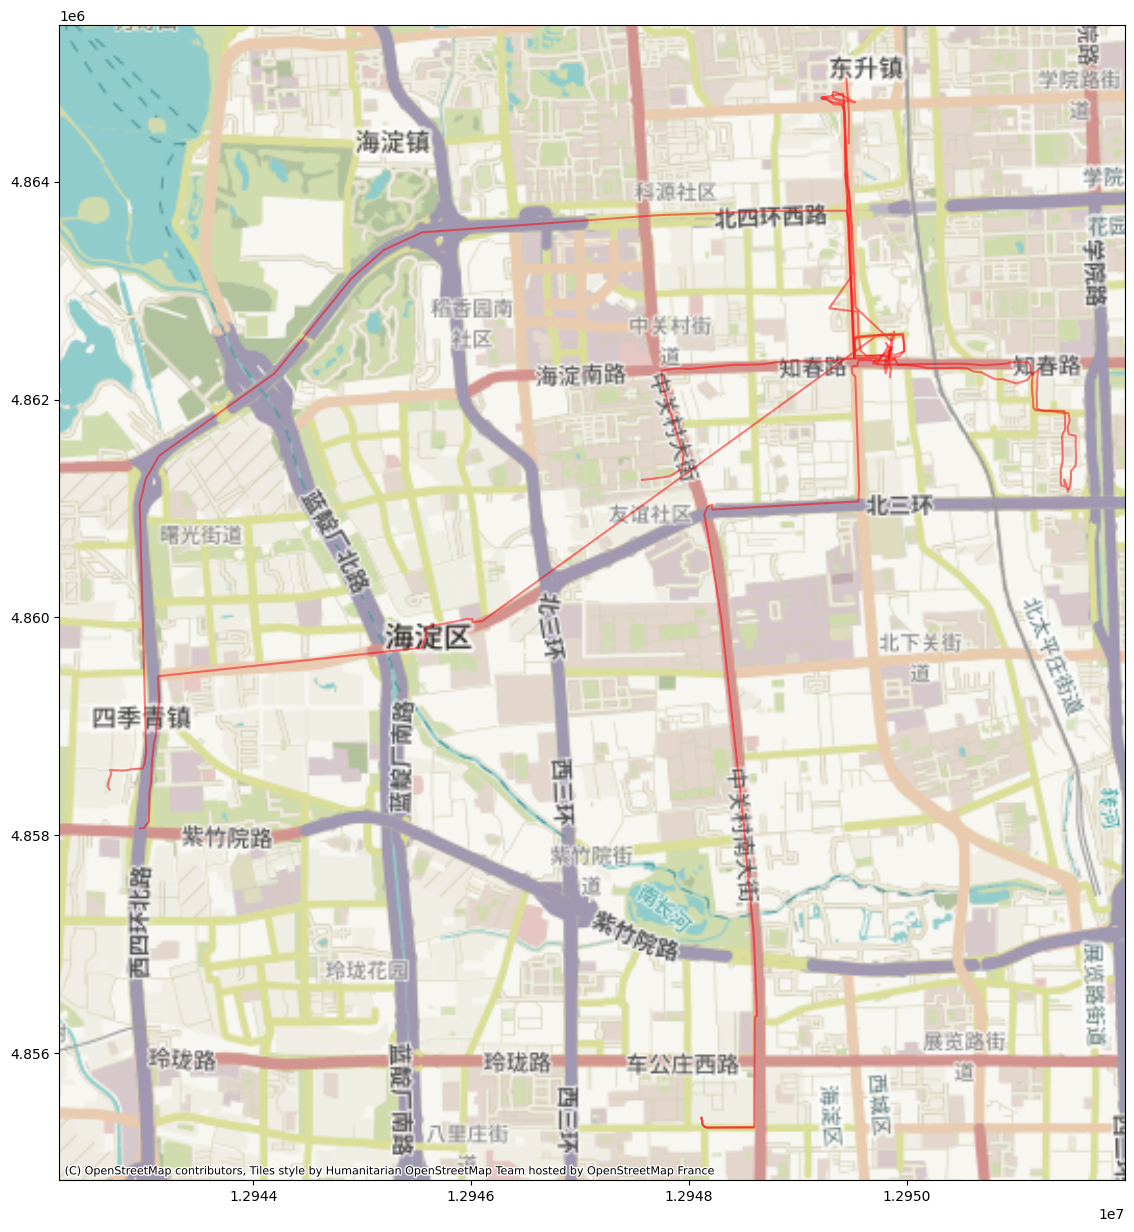

In [20]:
neigh_wm = geolife.iloc[:10].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, edgecolor="r")
contextily.add_basemap(ax, zoom=13)

plt.show()